<a href="https://colab.research.google.com/github/MHmi1/smart-text-analysis-dj/blob/master/EN_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classify IMDB Movie Reviews using a 1D ConvNet in Deep Learning
##### I build a 1D Convolutional nerual network using Keras to classify English movie reviews (from the IMDB dataset) based on their sentiment, into two classes - Positive and Negative

##Import the IMDB dataset from Keras
##### The IMDB dataset comes inbuilt in the Keras framework

In [5]:
# Import the dataset from keras.datasets module
from keras.datasets import imdb

# Limit the maximum size of the vocabulary to VOCAB_SIZE
VOCAB_SIZE = 30000
SKIP_COUNT = 0
# Filter out sentences which are longer than MAX_LENGTH
MAX_LENGTH = None

print("Loading the IMDB dataset...")
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=VOCAB_SIZE, skip_top=SKIP_COUNT, maxlen=MAX_LENGTH)
print("Dataset loaded!")

Loading the IMDB dataset...
17464789/17464789 [==============================] - 0s 0us/step
Dataset loaded!


In [6]:
print("Size of training set :", len(train_data))
print("Size of test set     :", len(test_data))

Size of training set : 25000
Size of test set     : 25000


In [7]:
print("Sample training example:")
print(train_data[3])
print("Label:")
print(train_labels[3])

Sample training example:
[1, 4, 18609, 16085, 33, 2804, 4, 2040, 432, 111, 153, 103, 4, 1494, 13, 70, 131, 67, 11, 61, 15305, 744, 35, 3715, 761, 61, 5766, 452, 9214, 4, 985, 7, 2, 59, 166, 4, 105, 216, 1239, 41, 1797, 9, 15, 7, 35, 744, 2413, 31, 8, 4, 687, 23, 4, 2, 7339, 6, 3693, 42, 38, 39, 121, 59, 456, 10, 10, 7, 265, 12, 575, 111, 153, 159, 59, 16, 1447, 21, 25, 586, 482, 39, 4, 96, 59, 716, 12, 4, 172, 65, 9, 579, 11, 6004, 4, 1615, 5, 23005, 7, 5168, 17, 13, 7064, 12, 19, 6, 464, 31, 314, 11, 2, 6, 719, 605, 11, 8, 202, 27, 310, 4, 3772, 3501, 8, 2722, 58, 10, 10, 537, 2116, 180, 40, 14, 413, 173, 7, 263, 112, 37, 152, 377, 4, 537, 263, 846, 579, 178, 54, 75, 71, 476, 36, 413, 263, 2504, 182, 5, 17, 75, 2306, 922, 36, 279, 131, 2895, 17, 2867, 42, 17, 35, 921, 18435, 192, 5, 1219, 3890, 19, 20523, 217, 4122, 1710, 537, 20341, 1236, 5, 736, 10, 10, 61, 403, 9, 2, 40, 61, 4494, 5, 27, 4494, 159, 90, 263, 2311, 4319, 309, 8, 178, 5, 82, 4319, 4, 65, 15, 9225, 145, 143, 5122, 12, 

In [8]:
# Get the mapping from each word in vocabulary to its index
word_to_index = imdb.get_word_index()

index_to_word = dict ( [(idx, word) for (word, idx) in word_to_index.items()] )


# Check the review in English too
english_review = ' '.join ( [index_to_word.get(idx-3, '?') for idx in train_data[3]] )

print("Earlier training example in English:")
print(english_review)

1641221/1641221 [==============================] - 0s 0us/step
Earlier training example in English:
? the scots excel at storytelling the traditional sort many years after the event i can still see in my mind's eye an elderly lady my friend's mother retelling the battle of ? she makes the characters come alive her passion is that of an eye witness one to the events on the ? heath a mile or so from where she lives br br of course it happened many years before she was born but you wouldn't guess from the way she tells it the same story is told in bars the length and breadth of scotland as i discussed it with a friend one night in ? a local cut in to give his version the discussion continued to closing time br br stories passed down like this become part of our being who doesn't remember the stories our parents told us when we were children they become our invisible world and as we grow older they maybe still serve as inspiration or as an emotional reservoir fact and fiction blend with as

In [9]:
# Since vocabulary size is restricted to VOCAB_SIZE, no word index should be greater than VOCAB_SIZE
max_index = max ( [max(review) for review in train_data] )

print("VOCAB_SIZE          =", VOCAB_SIZE)
print("Max index of a word =", max_index)

VOCAB_SIZE          = 30000
Max index of a word = 29999


## Prepare the dataset
##### Pad the integer sequences

In [10]:
# Find and store the length of the longest review in the dataset
max_train_length = max (len(review) for review in train_data)
max_test_length = max (len(review) for review in test_data)

max_length = max(max_train_length, max_test_length)
print("Maximum length of a review in dataset:", max_length)

Maximum length of a review in dataset: 2494


In [11]:
from keras.utils import pad_sequences

# Pad each review in the dataset till their length = max_length
print("Padding the reviews...")
train_data = pad_sequences (train_data, maxlen=max_length)
test_data = pad_sequences (test_data, maxlen=max_length)

print("Shape of train_data =", train_data.shape)
print("Shape of test_data  =", test_data.shape)

Padding the reviews...
Shape of train_data = (25000, 2494)
Shape of test_data  = (25000, 2494)


## Build the model
##### I build an 1D Convolutional neural architecure using Keras Sequential API

In [12]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout, Flatten, GlobalAveragePooling1D
from keras.regularizers import l2

model = Sequential()
model.add(Embedding(input_dim = VOCAB_SIZE,
                    output_dim = 128,
                    input_length = max_length))
model.add(Conv1D(filters = 128,
                 kernel_size = 3,
                 strides = 1,
                 padding = 'valid',
                 activation = 'relu',
                ))
model.add(MaxPooling1D(pool_size = 10))
model.add(GlobalMaxPooling1D())
model.add(Dense(units = 54,
                activation = 'relu'))
model.add(Dense(units = 1,
                activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2494, 128)         3840000   
                                                                 
 conv1d (Conv1D)             (None, 2492, 128)         49280     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 249, 128)         0         
 )                                                               
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 54)                6966      
                                                                 
 dense_1 (Dense)             (None, 1)                 5

In [13]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

## Train the model and tune the Hyperparameters

In [14]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau, TerminateOnNaN

callback_list = [
                 ModelCheckpoint(
                     filepath = '/content/drive/My Drive/Personal/Sentiment Analysis/best_CNNmodel.hdf5',
                     monitor = 'val_acc',
                     verbose = 1,
                     save_best_only = True,
                     save_weights_only = False,
                     mode = 'max',
                     period = 1
                 ),

                 EarlyStopping(
                    monitor = 'val_acc',
                    patience = 25,
                    verbose = 1,
                    mode = 'max',
                    baseline = 0.5,
                    restore_best_weights = True
                 ),

                 ReduceLROnPlateau(
                     monitor = 'val_loss',
                     factor = 0.2,
                     patience = 8,
                     verbose = 1,
                     mode = 'min',
                     cooldown = 1,
                     min_lr = 0
                 ),

                 TerminateOnNaN()
]

In [15]:
history = model.fit(train_data,
                    train_labels,
                    epochs = 121,
                    batch_size = 64,
                    verbose = 1,
                    callbacks = callback_list,
                    validation_split = 0.006,
                    shuffle = True)

Epoch 1/121
389/389 [==============================] - ETA: 0s - loss: 0.3958 - acc: 0.8117
Epoch 1: val_acc improved from -inf to 0.88667, saving model to /content/drive/My Drive/Personal/Sentiment Analysis/best_CNNmodel.hdf5
389/389 [==============================] - 96s 218ms/step - loss: 0.3958 - acc: 0.8117 - val_loss: 0.2796 - val_acc: 0.8867 - lr: 0.0010
Epoch 2/121
389/389 [==============================] - ETA: 0s - loss: 0.1546 - acc: 0.9442
Epoch 2: val_acc improved from 0.88667 to 0.90000, saving model to /content/drive/My Drive/Personal/Sentiment Analysis/best_CNNmodel.hdf5
389/389 [==============================] - 53s 137ms/step - loss: 0.1546 - acc: 0.9442 - val_loss: 0.2524 - val_acc: 0.9000 - lr: 0.0010
Epoch 3/121
389/389 [==============================] - ETA: 0s - loss: 0.0341 - acc: 0.9920
Epoch 3: val_acc improved from 0.90000 to 0.90667, saving model to /content/drive/My Drive/Personal/Sentiment Analysis/best_CNNmodel.hdf5
389/389 [==============================

In [16]:
print("Best Validation Accuracy =", max(history.history['val_acc'])*100)
print("Best Training Accuracy =", max(history.history['acc'])*100)

Best Validation Accuracy = 90.66666960716248
Best Training Accuracy = 100.0


## Plot the results

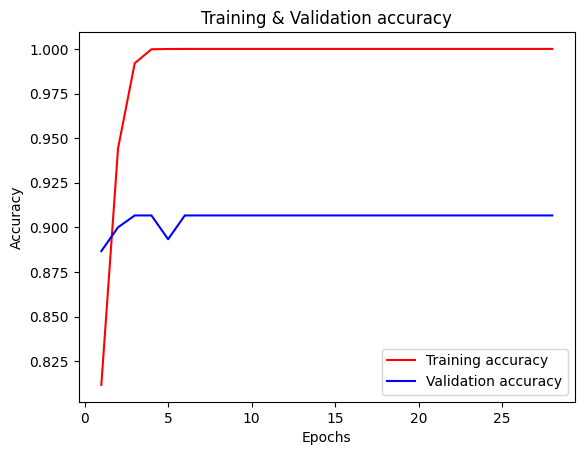

In [17]:
import matplotlib.pyplot as plt

train_acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training & Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

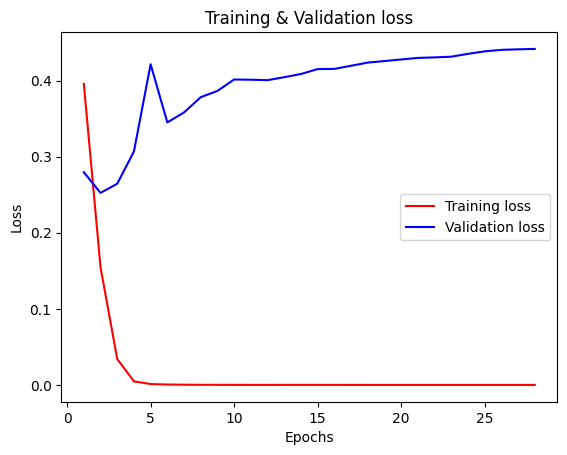

In [18]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, train_loss, 'r', label="Training loss")
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training & Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Test the final model

In [19]:
test_metrics = model.evaluate(test_data, test_labels)

782/782 [==============================] - 5s 7ms/step - loss: 0.3061 - acc: 0.8937


In [20]:
test_accuracy = test_metrics[1]
test_loss = test_metrics[0]

print("Test Accuracy :", test_accuracy)

Test Accuracy : 0.8937199711799622


In [22]:
from google.colab import drive
drive.mount('/content/gdrive')

model_save_name = 'EN_Sen_Analysis_Model.h5'
path = F"/content/gdrive/My Drive/{model_save_name}"
model.save(path)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
